**Groupby method is used with aggregation functions such as:**

*   mean,
*   standard deviation,
*   max and min,
*   count,
*   sum.

**While applying a function one of the following operations is used.**

**Aggregation** − Computes a summary statistic. Apply multiple functions to a column or many columns. At the end a different dataframe whose length is the number of unique values of the groupby keys is extracted.

**Transformation** − Performs some group-specific operation. Broadcast results of sub dataframes to original dataframe. It will always return a series with the same length to the original dataframe.

**Filtering** − Discards the data with some condition. It applies a filter on the results obtained from those sub dataframes. The filtered results will then be broadcast to any matching conditions in the original dataframe. In this situation, you'll obtain a condensed version of the full dataframe.

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("A.Efes 20-21 Euroleague-Points.csv")

In [6]:
df

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
5,Tolga Gecim,Forward,Turkey,24,206,6,33,4,0.67
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
8,Adrien Moerman,Forward,France,32,202,41,841,263,6.41
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25


In [58]:
df.groupby("Position")  
# it returns an object until the aggregation is applied.

In [59]:
df.groupby("Position")["Points"] 
# As with the GroupBy object, no computation is done until we call some aggregate on the object.

In [10]:
df.groupby("Position").get_group("Guard")

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25
11,Vasilije Micic,Guard,Serbia,26,196,40,1200,668,16.70
14,Krunoslav Simon,Guard,Croatia,35,197,35,932,362,10.34


In [9]:
df.groupby("Position")['Country'].value_counts(normalize=True).loc['Guard']

Country
Turkey     0.428571
Croatia    0.142857
France     0.142857
Serbia     0.142857
USA        0.142857
Name: Country, dtype: float64

In [11]:
df.groupby("Position")["Minutes"].mean().loc['Guard']

612.1428571428571

In [12]:
df.groupby("Position")["Minutes"].agg([max, min]).loc['Guard']

max    1200
min      50
Name: Guard, dtype: int64

In [13]:
filt = df['Position'] == 'Forward'
df.loc[filt]['Country'].str.contains('Turkey').sum()

2

In [14]:
pos_grp = df.groupby("Position")

In [16]:
pos_grp['Country'].str.contains('Turkey').sum()
# AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [17]:
pos_grp['Country'].apply(lambda x: x.str.contains('Turkey').sum())

Position
Center     1
Forward    2
Guard      3
Name: Country, dtype: int64

In [31]:
country_respondents = df['Country'].value_counts()
country_respondents

Turkey     6
USA        4
France     2
Germany    1
Serbia     1
Croatia    1
Name: Country, dtype: int64

In [32]:
game_position_guard = df.groupby("Country")['Position'].apply(lambda x: x.str.contains('Guard').sum())
game_position_guard

Country
Croatia    1
France     1
Germany    0
Serbia     1
Turkey     3
USA        1
Name: Position, dtype: int64

In [33]:
python_df = pd.concat([country_respondents, game_position_guard], axis='columns', sort=False)
python_df

,Country,Position
Turkey,6,3
USA,4,1
France,2,1
Germany,1,0
Serbia,1,1
Croatia,1,1


In [60]:
df.groupby("Position").describe()

Age                                                    Height  \
         count       mean       std   min   25%   50%   75%   max  count   
Position                                                                   
Center     3.0  31.333333  2.516611  29.0  30.0  31.0  32.5  34.0    3.0   
Forward    5.0  27.800000  4.969909  21.0  24.0  31.0  31.0  32.0    5.0   
Guard      7.0  28.857143  4.059087  23.0  26.5  28.0  31.5  35.0    7.0   

                      ... Points        Points(avg)                            \
                mean  ...    75%    max       count      mean       std   min   
Position              ...                                                       
Center    212.000000  ...  275.0  284.0         3.0  7.500000  0.615873  6.79   
Forward   203.000000  ...  249.0  263.0         5.0  3.670000  2.723848  0.67   
Guard     190.428571  ...  464.5  668.0         7.0  8.271429  6.524118  1.41   

                                       
            25%    50%     75%    max  
Position                               
Center    7.305   7.82   7.855   7.89  
Forward   1.000   4.20   6.070   6.41  
Guard     1.905  10.34  12.820  16.70  

[3 rows x 48 columns]

In [70]:
df["Height"].mean()

198.93333333333334

In [62]:
df.groupby("Position").max()
# it will return max values for each column separately

,Player,Country,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,,,
Center,Tibor Pleiss,USA,34,221,36,758,284,7.89
Forward,Yigitcan Saybir,USA,32,206,41,904,263,6.41
Guard,Vasilije Micic,USA,35,197,40,1200,668,16.70


In [7]:
df.groupby("Position").sum()

,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,
Center,94,636,94,1531,713,22.50
Forward,139,1015,131,2405,690,18.35
Guard,202,1333,202,4285,2050,57.90


In [71]:
# df.groupby("Position")["Height"].mean()
df.groupby("Position").Height.mean()

Position
Center     212.000000
Forward    203.000000
Guard      190.428571
Name: Height, dtype: float64

In [72]:
# df[df.Position == "Center"].Height.mean()
df[df["Position"] == "Center"].Height.mean()

212.0

In [73]:
df[df["Position"] == "Forward"].Height.mean()

203.0

In [3]:
df[df["Position"] == "Forward"]['Country'].value_counts()

USA       2
Turkey    2
France    1
Name: Country, dtype: int64

In [13]:
df[df["Position"] == "Forward"]['Minutes'].values

array([904,   5,  33, 841, 622], dtype=int64)

In [14]:
df[df["Position"] == "Forward"]['Minutes'].values.max()

904

In [74]:
df.groupby("Position").Height.max()

Position
Center     221
Forward    206
Guard      197
Name: Height, dtype: int64

In [75]:
# df.groupby("Position")["Height"].min()  ## indexing
df.groupby("Position").Height.min()

Position
Center     203
Forward    198
Guard      182
Name: Height, dtype: int64

In [8]:
df.groupby("Position").Height.sum()

Position
Center      636
Forward    1015
Guard      1333
Name: Height, dtype: int64

In [9]:
df.groupby("Position").Height.count()

Position
Center     3
Forward    5
Guard      7
Name: Height, dtype: int64

In [76]:
df.groupby("Position")[['Age', 'Height']].min()

,Age,Height
Position,,
Center,29,203
Forward,21,198
Guard,23,182


In [8]:
df.groupby("Position").count()

,Player,Country,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,,,
Center,3,3,3,3,3,3,3,3
Forward,5,5,5,5,5,5,5,5
Guard,7,7,7,7,7,7,7,7


In [12]:
df.groupby("Position").Position.count()

Position
Center     3
Forward    5
Guard      7
Name: Position, dtype: int64

In [14]:
df.groupby("Position").Position.count().loc['Center']

3

In [11]:
df.groupby("Position").Position.sum()

Position
Center                      CenterCenterCenter
Forward    ForwardForwardForwardForwardForward
Guard      GuardGuardGuardGuardGuardGuardGuard
Name: Position, dtype: object

In [32]:
df.groupby("Position").Games.mean()

Position
Center     31.333333
Forward    26.200000
Guard      28.857143
Name: Games, dtype: float64

In [8]:
df[df['Points']>400].groupby(['Player', 'Position']).Points.max()

Player             Position
Rodrigue Beaubois  Guard       401
Shane Larkin       Guard       528
Vasilije Micic     Guard       668
Name: Points, dtype: int64

In [10]:
df.groupby("Position").Games.std()

Position
Center      6.429101
Forward    20.315019
Guard      11.852265
Name: Games, dtype: float64

In [15]:
df.groupby("Position").Position.unique()

Position
Center      [Center]
Forward    [Forward]
Guard        [Guard]
Name: Position, dtype: object

In [77]:
df.groupby("Position").Points.agg(["count", "sum", "mean", "median", "max", "min"])
# .aggregate(["count", sum/np.sum/"sum", np.mean/"mean", np.median/"median", max/np.max/"max", min/np.min/"min"])
# eval("np.sqrt(8)")

,count,sum,mean,median,max,min
Position,,,,,,
Center,3,713,237.666667,266.0,284,163
Forward,5,690,138.000000,172.0,263,2
Guard,7,2050,292.857143,362.0,668,14


In [78]:
df.groupby("Position").aggregate(["count", sum, np.mean, "median", np.max, "min"])

Age                                 Height                    \
         count  sum       mean median amax min  count   sum        mean   
Position                                                                  
Center       3   94  31.333333   31.0   34  29      3   636  212.000000   
Forward      5  139  27.800000   31.0   32  21      5  1015  203.000000   
Guard        7  202  28.857143   28.0   35  23      7  1333  190.428571   

                 ...      Points                  Points(avg)         \
         median  ...        mean median amax  min       count    sum   
Position         ...                                                   
Center    212.0  ...  237.666667  266.0  284  163           3  22.50   
Forward   203.0  ...  138.000000  172.0  263    2           5  18.35   
Guard     190.0  ...  292.857143  362.0  668   14           7  57.90   

                                        
              mean median   amax   min  
Position                                
Center    7.500000   7.82   7.89  6.79  
Forward   3.670000   4.20   6.41  0.67  
Guard     8.271429  10.34  16.70  1.41  

[3 rows x 36 columns]

In [33]:
df.groupby("Position").aggregate({"Games": ("min", np.mean),
                                  "Points(avg)": "max"})

Games            Points(avg)
           min       mean         max
Position                             
Center      24  31.333333        7.89
Forward      2  26.200000        6.41
Guard        9  28.857143       16.70

In [15]:
df

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
5,Tolga Gecim,Forward,Turkey,24,206,6,33,4,0.67
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
8,Adrien Moerman,Forward,France,32,202,41,841,263,6.41
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25


In [22]:
df.groupby(['Position', 'Country']).count()

Player  Age  Height  Games  Minutes  Points  Points(avg)
Position Country                                                          
Center   Germany       1    1       1      1        1       1            1
         Turkey        1    1       1      1        1       1            1
         USA           1    1       1      1        1       1            1
Forward  France        1    1       1      1        1       1            1
         Turkey        2    2       2      2        2       2            2
         USA           2    2       2      2        2       2            2
Guard    Croatia       1    1       1      1        1       1            1
         France        1    1       1      1        1       1            1
         Serbia        1    1       1      1        1       1            1
         Turkey        3    3       3      3        3       3            3
         USA           1    1       1      1        1       1            1

In [12]:
df.groupby('Position', 'Country')['Points(avg)'].sum()
# it returns error; you must use lists for multiple observations with groupby

In [9]:
df.groupby(['Position', 'Country'])[['Points(avg)']].agg(['count', max, sum])

Points(avg)              
                       count    max    sum
Position Country                          
Center   Germany           1   6.79   6.79
         Turkey            1   7.82   7.82
         USA               1   7.89   7.89
Forward  France            1   6.41   6.41
         Turkey            2   1.00   1.67
         USA               2   6.07  10.27
Guard    Croatia           1  10.34  10.34
         France            1  10.55  10.55
         Serbia            1  16.70  16.70
         Turkey            3   2.25   5.22
         USA               1  15.09  15.09

In [25]:
df.groupby(['Position', 'Country'])[['Points(avg)']].agg(['count', sum]).T

Position           Center              Forward                 Guard         \
Country           Germany Turkey   USA  France Turkey    USA Croatia France   
Points(avg) count    1.00   1.00  1.00    1.00   2.00   2.00    1.00   1.00   
            sum      6.79   7.82  7.89    6.41   1.67  10.27   10.34  10.55   

Position                                
Country           Serbia Turkey    USA  
Points(avg) count    1.0   3.00   1.00  
            sum     16.7   5.22  15.09

In [20]:
df.groupby(['Position', 'Country'])[['Games', 'Points(avg)']].agg(['count', sum])

Games     Points(avg)       
                 count sum       count    sum
Position Country                             
Center   Germany     1  24           1   6.79
         Turkey      1  34           1   7.82
         USA         1  36           1   7.89
Forward  France      1  41           1   6.41
         Turkey      2   8           2   1.67
         USA         2  82           2  10.27
Guard    Croatia     1  35           1  10.34
         France      1  38           1  10.55
         Serbia      1  40           1  16.70
         Turkey      3  54           3   5.22
         USA         1  35           1  15.09

In [16]:
df.groupby(['Position', 'Country', 'Age'])[["Minutes"]].mean()

Minutes
Position Country Age         
Center   Germany 31     289.0
         Turkey  29     484.0
         USA     34     758.0
Forward  France  32     841.0
         Turkey  21       5.0
                 24      33.0
         USA     31     763.0
Guard    Croatia 35     932.0
         France  32     814.0
         Serbia  26    1200.0
         Turkey  23      50.0
                 27      91.0
                 31     195.0
         USA     28    1003.0

In [81]:
%matplotlib inline

<AxesSubplot:xlabel='Position'>

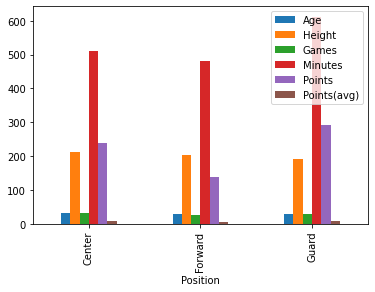

In [82]:
df.groupby("Position").mean().plot(kind="bar")

# Filtering

In [83]:
df.head()

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41


In [84]:
df.groupby('Position').mean()

,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,
Center,31.333333,212.000000,31.333333,510.333333,237.666667,7.500000
Forward,27.800000,203.000000,26.200000,481.000000,138.000000,3.670000
Guard,28.857143,190.428571,28.857143,612.142857,292.857143,8.271429


In [85]:
def filter_func(x):
  return x["Minutes"].mean() > 500 and x["Games"].mean() > 30

In [86]:
df.groupby("Position").filter(filter_func)
# function is true for only Center Players

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
10,Tibor Pleiss,Center,Germany,31,221,24,289,163,6.79
13,Bryant Dunston,Center,USA,34,203,36,758,284,7.89


In [87]:
df.groupby("Position").filter(lambda x: x["Minutes"].mean() > 500 and x["Games"].mean() > 30)

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
10,Tibor Pleiss,Center,Germany,31,221,24,289,163,6.79
13,Bryant Dunston,Center,USA,34,203,36,758,284,7.89


In [6]:
df.groupby("Position").filter(lambda x: x["Minutes"].mean() > 500)
# it shows all group members

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25
10,Tibor Pleiss,Center,Germany,31,221,24,289,163,6.79
11,Vasilije Micic,Guard,Serbia,26,196,40,1200,668,16.70
13,Bryant Dunston,Center,USA,34,203,36,758,284,7.89
14,Krunoslav Simon,Guard,Croatia,35,197,35,932,362,10.34


In [47]:
df.groupby("Player").filter(lambda x: x["Points"] == df["Points"].max())

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
11,Vasilije Micic,Guard,Serbia,26,196,40,1200,668,16.7


In [5]:
df.groupby("Position").filter(lambda x: x["Minutes"].mean() > 500).groupby("Position").mean()

,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,
Center,31.333333,212.000000,31.333333,510.333333,237.666667,7.500000
Guard,28.857143,190.428571,28.857143,612.142857,292.857143,8.271429


In [88]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [89]:
display("df", "df.groupby('Position').mean()", "df.groupby('Position').filter(filter_func)")

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
5,Tolga Gecim,Forward,Turkey,24,206,6,33,4,0.67
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
8,Adrien Moerman,Forward,France,32,202,41,841,263,6.41
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25


# transform() , apply ()

.transform() can take a function, a string function, a list of functions, and a dict. However, apply() is only allowed a function.

.apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [90]:
df

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
5,Tolga Gecim,Forward,Turkey,24,206,6,33,4,0.67
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
8,Adrien Moerman,Forward,France,32,202,41,841,263,6.41
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25


In [4]:
df.groupby("Position").max()

,Player,Country,Age,Height,Games,Minutes,Points,Points(avg)
Position,,,,,,,,
Center,Tibor Pleiss,USA,34,221,36,758,284,7.89
Forward,Yigitcan Saybir,USA,32,206,41,904,263,6.41
Guard,Vasilije Micic,USA,35,197,40,1200,668,16.70


In [12]:
df.groupby(["Position"])[["Points", "Games", "Minutes"]].apply(lambda x: x.mean())

,Points,Games,Minutes
Position,,,
Center,237.666667,31.333333,510.333333
Forward,138.000000,26.200000,481.000000
Guard,292.857143,28.857143,612.142857


In [13]:
df.groupby(["Position"])[["Points", "Games", "Minutes"]].transform(lambda x: x.mean())

,Points,Games,Minutes
0,292.857143,28.857143,612.142857
1,292.857143,28.857143,612.142857
2,138.000000,26.200000,481.000000
3,138.000000,26.200000,481.000000
4,292.857143,28.857143,612.142857
5,138.000000,26.200000,481.000000
6,292.857143,28.857143,612.142857
7,237.666667,31.333333,510.333333
8,138.000000,26.200000,481.000000
9,292.857143,28.857143,612.142857


In [8]:
df.groupby('Position')[['Games', 'Minutes', 'Points']].apply(lambda x: x - x.max())

,Games,Minutes,Points
0,-5,-197,-140
1,-2,-386,-267
2,0,0,-14
3,-39,-899,-261
4,-11,-1005,-627
5,-35,-871,-259
6,-31,-1150,-654
7,-2,-274,-18
8,0,-63,0
9,-24,-1109,-632


In [7]:
df.groupby('Position')[['Games', 'Minutes', 'Points']].transform(lambda x: x - x.max())

,Games,Minutes,Points
0,-5,-197,-140
1,-2,-386,-267
2,0,0,-14
3,-39,-899,-261
4,-11,-1005,-627
5,-35,-871,-259
6,-31,-1150,-654
7,-2,-274,-18
8,0,-63,0
9,-24,-1109,-632


In [94]:
def data2(x):
    # x is a DataFrame of group values
    x['Minutes'] /= x['Games'].sum()
    return x

display('df', "df.groupby('Position').apply(data2)")

,Player,Position,Country,Age,Height,Games,Minutes,Points,Points(avg)
0,Shane Larkin,Guard,USA,28,182,35,1003,528,15.09
1,Rodrigue Beaubois,Guard,France,32,190,38,814,401,10.55
2,Chris Singleton,Forward,USA,31,206,41,904,249,6.07
3,Yigitcan Saybir,Forward,Turkey,21,203,2,5,2,1.00
4,Dogus Balbay,Guard,Turkey,31,185,29,195,41,1.41
5,Tolga Gecim,Forward,Turkey,24,206,6,33,4,0.67
6,Erten Gazi,Guard,Turkey,23,190,9,50,14,1.56
7,Sertac Sanli,Center,Turkey,29,212,34,484,266,7.82
8,Adrien Moerman,Forward,France,32,202,41,841,263,6.41
9,Bugrahan Tuncer,Guard,Turkey,27,193,16,91,36,2.25


**Specifying the split key**

**A list, array, series, or index providing the grouping keys**

The key can be any series or list with a length matching that of the DataFrame.

In [95]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [96]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

#0: data1: 0+2+5 = 7
#0: data2: 5+3+9 = 17
#1: data1: 1+3 = 4
#1: data2: 0+3 =3
#2: data1: 4
#2: data2: 7

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

**Any Python function**

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [97]:
df2 = df.set_index('key')
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0
